In [3]:
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [4]:
import tensorflow as tf

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


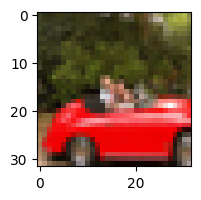

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[99])

In [8]:
y_train.reshape(-1)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
classes =['aeroplane','automobile','bird','cat','deer','frog','horse','boat','truck']

In [10]:

x_train = x_train / 255
x_test = x_test / 255

# Define a simple artificial neural network (ANN) model
ann = keras.models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model on the training data
ann.fit(x_train, y_train, epochs=10)


2023-12-20 05:34:12.849010: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 120s 76ms/step - loss: 1.8137 - accuracy: 0.3542
Epoch 2/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.6243 - accuracy: 0.4248
Epoch 3/10
1563/1563 [==============================] - 151s 96ms/step - loss: 1.5401 - accuracy: 0.4564
Epoch 4/10
1563/1563 [==============================] - 132s 84ms/step - loss: 1.4828 - accuracy: 0.4786
Epoch 5/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4304 - accuracy: 0.4981
Epoch 6/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.3864 - accuracy: 0.5132
Epoch 7/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.3498 - accuracy: 0.5261
Epoch 8/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.3156 - accuracy: 0.5397
Epoch 9/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.2835 - accuracy: 0.5494
Epoch 10/10
1563/1563 [==============================] - 84

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(x_test)
y_pred_class = [np.argmax(ele) for ele in y_pred]

print("Classification Report:\n", classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)


313/313 [==============================] - 7s 22ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.60      0.59      1000
           1       0.64      0.66      0.65      1000
           2       0.37      0.50      0.42      1000
           3       0.46      0.21      0.29      1000
           4       0.47      0.41      0.44      1000
           5       0.48      0.40      0.44      1000
           6       0.55      0.59      0.57      1000
           7       0.47      0.70      0.56      1000
           8       0.61      0.69      0.65      1000
           9       0.67      0.50      0.57      1000

    accuracy                           0.53     10000
   macro avg       0.53      0.53      0.52     10000
weighted avg       0.53      0.53      0.52     10000

Confusion Matrix:
 [[603  32  96   9  22   8  19  50 138  23]
 [ 41 664  24  11   6  10  20  47  76 101]
 [ 77  18 498  35  91  59  80 109  26   7]
 [ 41  22 143

Text(95.72222222222221, 0.5, 'true values')

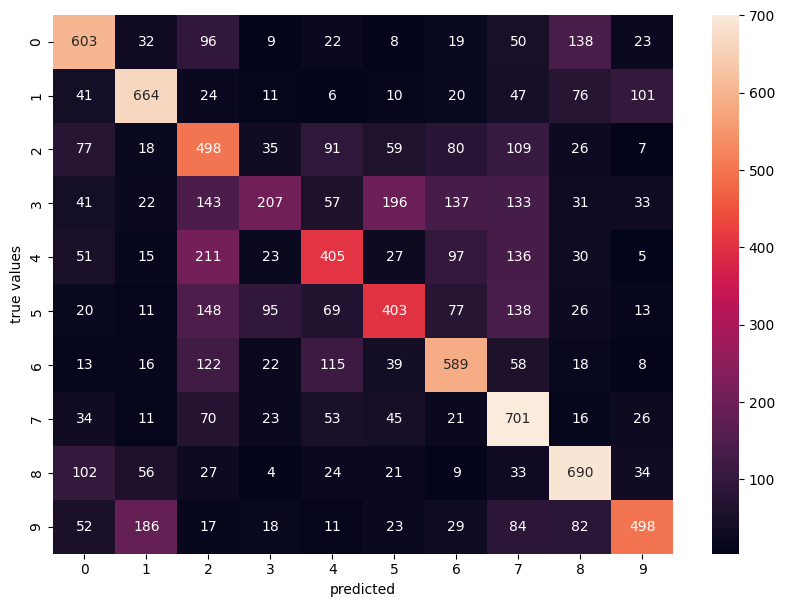

In [12]:
import seaborn as sms
plt.figure(figsize=(10,7))
sms.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true values')

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

cnn = keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)


2023-12-20 05:53:29.756507: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 37s 22ms/step - loss: 1.4715 - accuracy: 0.4720
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1162 - accuracy: 0.6104
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9866 - accuracy: 0.6570
Epoch 4/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9031 - accuracy: 0.6884
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8354 - accuracy: 0.7121
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7848 - accuracy: 0.7279
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7406 - accuracy: 0.7447
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.6987 - accuracy: 0.7563
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6611 - accuracy: 0.7693
Epoch 10/10
1563/1563 [==============================] - 41s 26m

In [14]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9282 - accuracy: 0.6943


[0.9281657338142395, 0.6942999958992004]

In [15]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[1.1746039e-02, 6.3623425e-05, 1.1929013e-02, 5.6501788e-01,
        3.4895327e-03, 1.9806278e-01, 1.8494781e-02, 6.2314852e-04,
        1.9013123e-01, 4.4196509e-04],
       [3.6492397e-03, 3.9537510e-01, 1.4985870e-06, 3.8730555e-08,
        4.2019010e-08, 2.6955471e-09, 1.1827633e-09, 1.3149432e-07,
        6.0068786e-01, 2.8605279e-04],
       [4.2937633e-02, 7.9937696e-01, 1.0880533e-03, 1.5327645e-03,
        2.0703571e-04, 1.0736366e-04, 1.8249393e-05, 4.4477620e-04,
        1.1829798e-01, 3.5989054e-02],
       [9.9281353e-01, 2.0949180e-04, 3.8960606e-03, 1.4636473e-05,
        6.4921461e-04, 1.2116225e-06, 3.6511319e-06, 5.0703957e-06,
        2.3843048e-03, 2.2818880e-05],
       [4.7480603e-06, 1.0946537e-05, 1.5326686e-03, 1.9074542e-03,
        3.7207084e-03, 5.0759100e-04, 9.9225760e-01, 2.9768592e-06,
        5.1186609e-05, 4.0368154e-06]], dtype=float32)

In [16]:
y_class = [np.argmax(ele) for ele in y_pred]
y_class[:5]

[3, 8, 1, 0, 6]

In [17]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [18]:
cm = tf.math.confusion_matrix(labels= y_test,predictions= y_class)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[787,  26,  70,  15,  21,   5,   5,   8,  38,  25],
       [ 40, 861,   8,   6,   2,   0,   8,   1,  18,  56],
       [ 82,  16, 597,  47,  89,  57,  55,  40,   6,  11],
       [ 40,  17,  92, 432,  96, 160,  88,  50,  15,  10],
       [ 33,   5,  67,  43, 659,  25,  79,  77,   8,   4],
       [ 26,   7,  78, 114,  55, 591,  37,  67,  14,  11],
       [ 14,  11,  65,  44,  39,  13, 789,  12,   8,   5],
       [ 36,  10,  53,  20,  62,  43,  11, 745,   4,  16],
       [111,  55,  26,  13,   9,   3,   5,   7, 747,  24],
       [ 55, 129,   9,  15,  10,   5,   4,  23,  15, 735]], dtype=int32)>

Text(95.72222222222221, 0.5, 'true value')

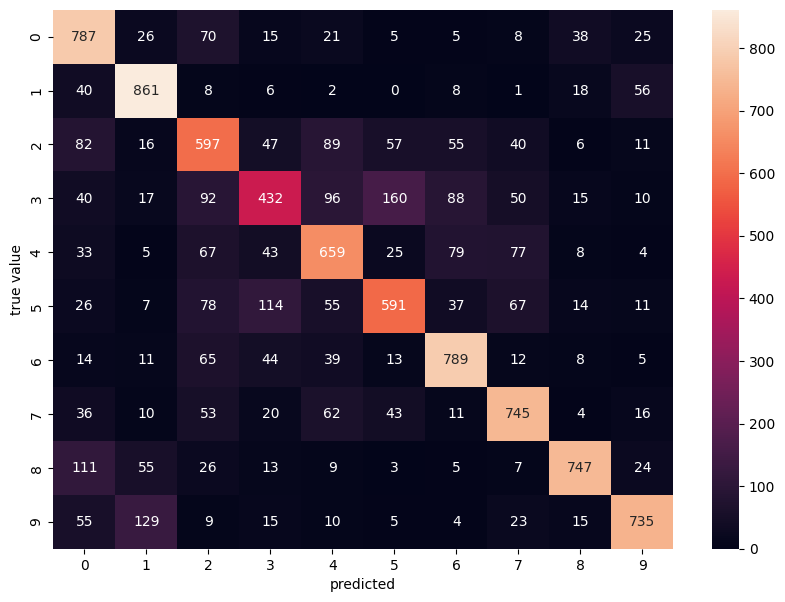

In [21]:
plt.figure(figsize=(10,7))
sms.heatmap(cm,annot = True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('true value')
